In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = sns.load_dataset('titanic')

In [6]:
df.shape

(891, 15)

In [7]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


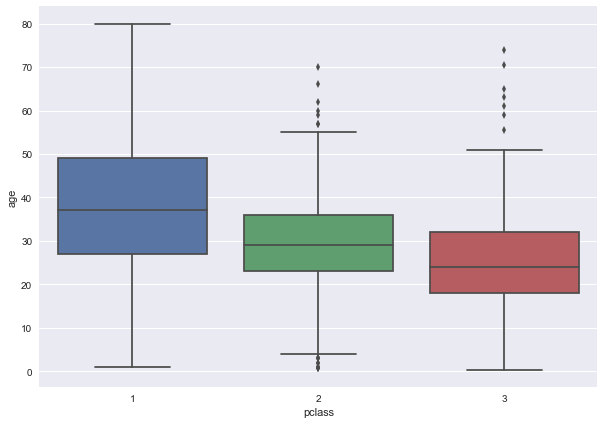

In [9]:
plt.figure(figsize=(10,7))
sns.boxplot(x='pclass',y='age',data=df);

In [10]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [11]:
df['age'] = df[['age','pclass']].apply(impute_age, axis=1)

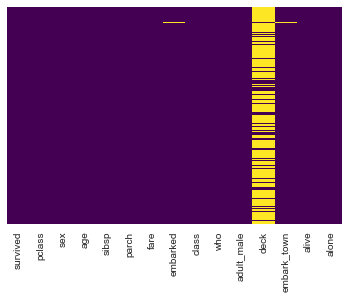

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [10]:
df.drop('deck', axis=1, inplace=True)

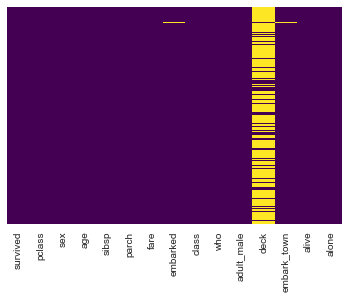

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [14]:
df.dropna(inplace=True)

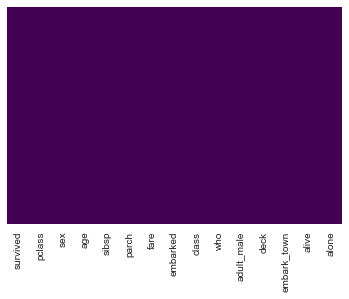

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [16]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [20]:
X = df[['pclass', 'sex', 'age']]
X['sex'] = pd.get_dummies(df['sex'],drop_first=True)
y = df['survived']



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [19]:
X.shape

(201, 3)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))

In [25]:
from sklearn.ensemble import AdaBoostClassifier

In [26]:
ada_clf = AdaBoostClassifier()

In [27]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [28]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.8286

Classification Report: 
              precision    recall  f1-score   support

          0       0.75      0.84      0.79        55
          1       0.89      0.82      0.85        85

avg / total       0.83      0.83      0.83       140


Confusion Matrix: 
 [[46  9]
 [15 70]]

Average Accuracy: 	 0.7236
Accuracy SD: 		 0.0950


In [29]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8033

Classification Report: 
              precision    recall  f1-score   support

          0       0.50      1.00      0.67        12
          1       1.00      0.76      0.86        49

avg / total       0.90      0.80      0.82        61


Confusion Matrix: 
 [[12  0]
 [12 37]]



## AdaBoost with Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
ada_clf = AdaBoostClassifier(RandomForestClassifier())

In [32]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [33]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9214

Classification Report: 
              precision    recall  f1-score   support

          0       0.91      0.89      0.90        55
          1       0.93      0.94      0.94        85

avg / total       0.92      0.92      0.92       140


Confusion Matrix: 
 [[49  6]
 [ 5 80]]

Average Accuracy: 	 0.7513
Accuracy SD: 		 0.0895


In [35]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8525

Classification Report: 
              precision    recall  f1-score   support

          0       0.57      1.00      0.73        12
          1       1.00      0.82      0.90        49

avg / total       0.92      0.85      0.87        61


Confusion Matrix: 
 [[12  0]
 [ 9 40]]



In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [38]:
print_score(gbc_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9214

Classification Report: 
              precision    recall  f1-score   support

          0       0.87      0.95      0.90        55
          1       0.96      0.91      0.93        85

avg / total       0.92      0.92      0.92       140


Confusion Matrix: 
 [[52  3]
 [ 8 77]]

Average Accuracy: 	 0.7610
Accuracy SD: 		 0.0945


In [39]:
print_score(gbc_clf, X_train, y_train, X_test, y_test, train=False) # Test

Test Result:

accuracy score: 0.8197

Classification Report: 
              precision    recall  f1-score   support

          0       0.52      0.92      0.67        12
          1       0.97      0.80      0.88        49

avg / total       0.89      0.82      0.84        61


Confusion Matrix: 
 [[11  1]
 [10 39]]



In [44]:
!pip install xgboost

You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [45]:
import xgboost as xgb

In [46]:
xgb_clf = xgb.XGBClassifier(max_depth=3, n_estimators=5000, learning_rate=0.2,
                            n_jobs=-1)

In [47]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=5000,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [48]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9143

Classification Report: 
              precision    recall  f1-score   support

          0       0.89      0.89      0.89        55
          1       0.93      0.93      0.93        85

avg / total       0.91      0.91      0.91       140


Confusion Matrix: 
 [[49  6]
 [ 6 79]]

Average Accuracy: 	 0.7503
Accuracy SD: 		 0.1058


In [49]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8525

Classification Report: 
              precision    recall  f1-score   support

          0       0.59      0.83      0.69        12
          1       0.95      0.86      0.90        49

avg / total       0.88      0.85      0.86        61


Confusion Matrix: 
 [[10  2]
 [ 7 42]]

